##Iteration 4 - Improvements through learning rate & increase in parameters

* So far, we have been able to achieve 99.30 validation accuracy

* Learning rate is something we haven't touched yet, we will therefore use ADAM and learning rate scheduler to check if accuracy improves

* If the accuracy is close to 99.4, we will just increase the number of epochs to 50 and see if the accuracy improves

* If the accuracy, is not very close, we will increase parameters and try training it again

* _Improved accuracy with use of Learning rate scheduler: 99.38_

* _Improved accuracy due to increase in number of epochs from 30 to 50: 99.15_ [**DIDN'T HELP!!**]

* _Accuracy due to changed network: 99.41_ [Epochs back to 30 from 50]

###HIGHEST ACCURACY ACHIEVED:  99.41

### **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

import numpy as np

from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

from keras.datasets import mnist

### Load pre-shuffled MNIST data & inspect a few images

(60000, 28, 28)


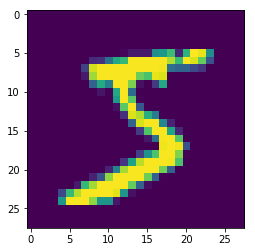

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

###Modify loaded data to match with the shape of form of an input required by a keras model

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

###Build the network

In [17]:
from keras.layers import Activation
model = Sequential()

#Convolution Block 1
model.add(Convolution2D(12, 3, activation='relu', input_shape=(28,28,1)))     #Receptive Field:  3;   Input Channels:  3;  Resol:  26
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(16, 3, activation='relu'))                           #Receptive Field:  5;   Input Channels:  12;  Resol:  24
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(16, 3, activation='relu'))                           #Receptive Field:  7;   Input Channels: 16;  Resol:  22
model.add(BatchNormalization())
model.add(Dropout(0.2))

#Transition Block 1
model.add(Convolution2D(32, 1, activation='relu'))                           #Receptive Field:  7;   Input Channels: 16;  Resol:  22
model.add(MaxPooling2D(2,2))                                                    #Receptive Field: 14;   Input Channels: 32;  Resol:  11

#Convolution Block 2
model.add(Convolution2D(12, 3, activation='relu'))                            #Receptive Field: 16;   Input Channels: 32;  Resol:  9
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(16, 3, activation='relu'))                           #Receptive Field: 18;   Input Channels:  12;  Resol:  7
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(16, 3, activation='relu'))                           #Receptive Field: 20;   Input Channels: 16;  Resol:  5
model.add(BatchNormalization())
model.add(Dropout(0.2))

#Final Layers
model.add(Convolution2D(10, 3, activation='relu'))                              #Receptive Field: 24;   Input Channels: 16;  Resol:  3
model.add(Convolution2D(10, 3))                                                 #Receptive Field: 28;   Input Channels: 10;  Resol:  1
model.add(Flatten())
model.add(Activation('softmax'))

#MODEL ARCHITECTURE SUMMARY
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_25 (Batc (None, 26, 26, 12)        48        
_________________________________________________________________
dropout_25 (Dropout)         (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 16)        1744      
_________________________________________________________________
batch_normalization_26 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_26 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 22, 22, 16)        2320      
__________

###Provide parameters on which the model will train

In [0]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(lr=0.003),
             metrics=['accuracy'])

###Start training the model, save the model with best val accuracy

In [25]:
checkpointfilepath = "eva_assignment4_iteration4b.hdf5"
checkpoint = ModelCheckpoint(checkpointfilepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, LearningRateScheduler(scheduler, verbose=1)]
model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 13s 209us/step - loss: 0.0586 - acc: 0.9821 - val_loss: 0.0488 - val_acc: 0.9860

Epoch 00001: val_acc improved from -inf to 0.98600, saving model to eva_assignment4_iteration4b.hdf5
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 12s 206us/step - loss: 0.0459 - acc: 0.9855 - val_loss: 0.0302 - val_acc: 0.9908

Epoch 00002: val_acc improved from 0.98600 to 0.99080, saving model to eva_assignment4_iteration4b.hdf5
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 12s 206us/step - loss: 0.0401 - acc: 0.9879 - val_loss: 0.0304 - val_acc: 0.9906

Epoch 00003: val_acc did not improve from 0.99080
Epoch 4/30

Epoch 00004: LearningRateScheduler setting le

###Check model accuracy

In [26]:
model.load_weights(checkpointfilepath)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.022437573228518887, 0.9941]


In [27]:
#CHECK A FEW MISCLASSIFIED IMAGES:
y_pred = model.predict(X_test)
y_pred.shape

(10000, 10)

###Visualize what the filters in a particular layer extract

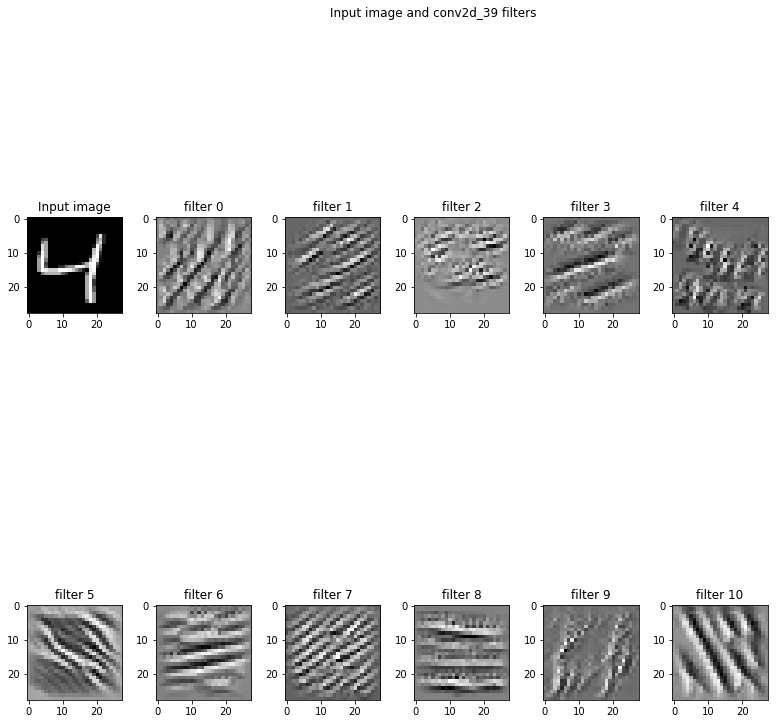

In [28]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_39'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

In [24]:
#CHECK A FEW MISCLASSIFIED IMAGES:
!ls

eva_assignment4_iteration4b.hdf5  eva_assignment4_iteration4.hdf5  sample_data
